<a href="https://colab.research.google.com/github/priyasoniy17/Statistical-Analysis/blob/main/Customer_Segmentation_using_ABC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
center_info = pd.read_csv('/content/sample_data/fulfilment_center_info.csv')
meal_info = pd.read_csv('/content/sample_data/meal_info.csv')
train_data = pd.read_csv('/content/sample_data/train.csv')

In [4]:
merge1 = pd.merge(train_data, center_info, how='inner', on='center_id')
merge1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0.0,0.0,177.0,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0.0,0.0,270.0,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0.0,0.0,189.0,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0.0,0.0,54.0,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0.0,0.0,40.0,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206447,1345381,68,61,2492,445.23,446.23,0.0,0.0,68.0,473,77,TYPE_A,4.5
206448,1445677,68,61,2304,515.13,513.13,0.0,0.0,27.0,473,77,TYPE_A,4.5
206449,1048398,68,61,2664,328.89,327.89,0.0,0.0,379.0,473,77,TYPE_A,4.5
206450,1389863,68,61,2569,328.89,327.89,0.0,0.0,527.0,473,77,TYPE_A,4.5


In [6]:
df = pd.merge(merge1, meal_info, on='meal_id')
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0.0,0.0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0.0,0.0,323.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0.0,0.0,96.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0.0,0.0,163.0,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0.0,0.0,215.0,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206447,1469068,63,61,2104,631.53,631.53,0.0,0.0,14.0,473,77,TYPE_A,4.5,Fish,Continental
206448,1000382,64,61,2104,629.53,631.53,0.0,0.0,41.0,473,77,TYPE_A,4.5,Fish,Continental
206449,1418424,65,61,2104,630.53,631.53,0.0,0.0,26.0,473,77,TYPE_A,4.5,Fish,Continental
206450,1452957,67,61,2104,631.53,629.53,0.0,0.0,42.0,473,77,TYPE_A,4.5,Fish,Continental


<ipython-input-12-6fd3bca35496>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



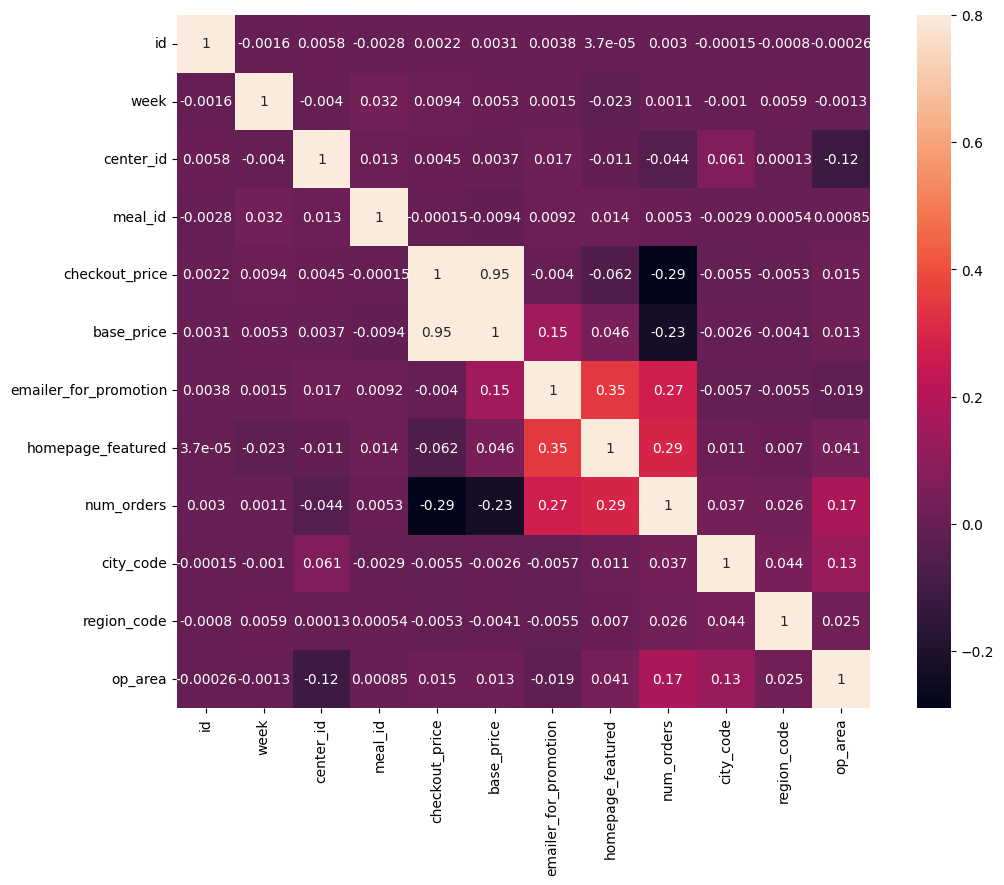

In [12]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [70]:
var = ['center_type', 'category','cuisine']
df_=df.copy()
for i in var:
    df_[i] = pd.factorize(df_[i])[0]
X = df_.drop(['num_orders','emailer_for_promotion','homepage_featured'], axis=1)
y = df_['num_orders']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X.isnull().sum()

id                0
week              0
center_id         0
meal_id           0
checkout_price    0
base_price        0
city_code         0
region_code       0
center_type       0
op_area           0
category          0
cuisine           0
dtype: int64

In [73]:
y_test=y_test.fillna(0)
y_test.isnull().sum()

0

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
diff=pd.DataFrame(y_test,y_pred)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 369.40458239812017


In [76]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Root Mean Squared Error for knn:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for knn: 401.73171076124834


In [77]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 229.84480898233176


In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train, y_train)
print('Root Mean Squared Error for rf:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for rf: 229.84480898233176


In [80]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print('Root Mean Squared Error for xgb:',np.sqrt(mse))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[18:56:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.



Root Mean Squared Error for xgb: 166.1527454775988


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

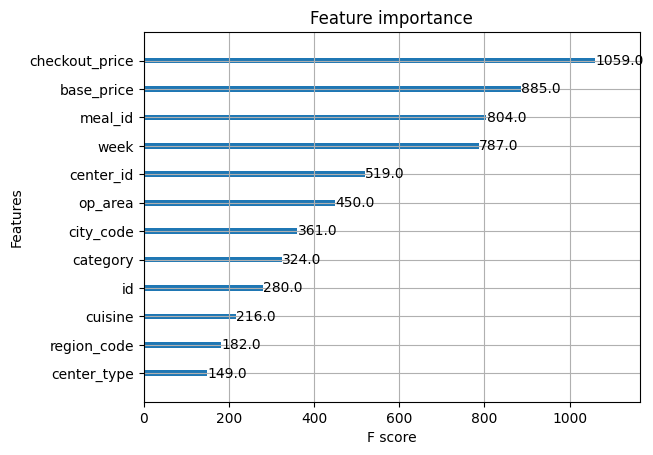

In [81]:
xgb.plot_importance(xgb_model)